In [1]:
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("rainbow")
df = pd.read_csv('./data/data2020_mod.csv')

In [3]:
df.head()

,prefRoute,Max Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity
0,ADAWE,1.1,0.0,0.0,15,26.0,35,9.2,1.2,1,3,0.8
1,LMET,4.4,0.0,0.0,15,20.0,41,9.2,1.2,0,4,0.8
2,LMET,4.7,0.0,0.0,6,22.2,45,9.2,1.2,0,5,0.7
3,LMET,1.4,0.0,1.8,4,22.2,45,9.2,1.2,0,6,0.4
4,ADAWE,-3.0,0.0,0.0,6,28.0,37,9.2,1.2,0,7,0.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prefRoute                  365 non-null    object 
 1   Max Temp (°C)              365 non-null    float64
 2   Total Rain (mm)            365 non-null    float64
 3   Total Snow (cm)            365 non-null    float64
 4   Snow on Grnd (cm)          365 non-null    int64  
 5   Dir of Max Gust (10s deg)  365 non-null    float64
 6   Spd of Max Gust (km/h)     365 non-null    int64  
 7   hours of daylight (hrs)    365 non-null    float64
 8   UV Index                   365 non-null    float64
 9   holiday                    365 non-null    int64  
 10  weekday                    365 non-null    int64  
 11  humidity                   365 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.3+ KB


In [5]:
df.columns

Index(['prefRoute', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
       'holiday', 'weekday', 'humidity'],
      dtype='object')

In [6]:
# numerical summary, only applies to numerical columns
df.describe()

,Max Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,12.540274,1.884384,0.522192,4.432877,22.234521,45.030137,12.303288,5.013425,0.030137,3.997260,0.643288
std,12.188438,4.991234,2.071079,9.280963,8.233583,9.312444,2.435117,2.833126,0.171199,2.000685,0.152056
min,-16.300000,0.000000,0.000000,0.000000,1.000000,32.000000,8.800000,1.000000,0.000000,1.000000,0.000000
25%,2.700000,0.000000,0.000000,0.000000,20.000000,39.000000,9.500000,2.000000,0.000000,2.000000,0.500000
50%,12.600000,0.000000,0.000000,0.000000,22.200000,45.000000,12.000000,4.000000,0.000000,4.000000,0.600000
75%,23.100000,0.700000,0.000000,3.000000,28.000000,48.000000,14.200000,7.500000,0.000000,6.000000,0.700000
max,36.900000,38.900000,18.800000,49.000000,36.000000,80.000000,15.750000,9.000000,1.000000,7.000000,1.000000


In [7]:
len(df)# samples of the Bike patterns

365

In [8]:
print(df.prefRoute) # future input parameters

0      ADAWE
1       LMET
2       LMET
3       LMET
4      ADAWE
       ...  
360    ADAWE
361    ADAWE
362    ADAWE
363     OGLD
364    ADAWE
Name: prefRoute, Length: 365, dtype: object


In [9]:
#sns.pairplot(df,hue='prefRoute')

#sns.countplot(x = 'prefRoute', data = df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Need to set this up for Workshop
#X = df.drop(['prefRoute', 'Total Snow (cm)', 'holiday'],axis=1)
X = df.drop(['prefRoute'],axis=1)
y = df['prefRoute']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train.info()
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.series.Series'>
Index: 255 entries, 74 to 134
Series name: prefRoute
Non-Null Count  Dtype 
--------------  ----- 
255 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
(110, 11)
(110,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [14]:
clf.fit(X_train,y_train)


RandomForestClassifier()

In [15]:
y_pred=clf.predict(X_test)


In [16]:
preferedRoute_index = clf.predict([[1.1,3.0,10.0,15,26.0,35,9.2,1.2,1,3,0.8]])
#Need to set this up for Workshop
print(preferedRoute_index)

['LMET']


In [17]:
from sklearn import metrics

In [18]:
print(list(y_test))
print(list(y_pred))

['COBY', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'LMET', 'ADAWE', 'OBVW', 'ADAWE', 'ADAWE', 'ADAWE', 'OBVW', 'ADAWE', 'CRTZ', 'LMET', 'LMET', 'CRTZ', 'ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'COBY', 'OGLD', 'ADAWE', 'LMET', 'ADAWE', 'CRTZ', 'ADAWE', 'LMET', 'LMET', 'ADAWE', 'LMET', 'LMET', 'LMET', 'ORPY', 'LMET', 'LMET', 'COBY', 'ADAWE', 'CRTZ', 'ALEX', 'ADAWE', 'ORPY', 'COBY', 'ADAWE', 'ADAWE', 'CRTZ', 'ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'LMET', 'COBY', 'LMET', 'ADAWE', 'ADAWE', 'LMET', 'LMET', 'LMET', 'LMET', 'ORPY', 'LMET', 'LMET', 'CRTZ', 'ADAWE', 'COBY', 'ADAWE', 'ADAWE', 'LMET', 'ORPY', 'LMET', 'ADAWE', 'ADAWE', 'CRTZ', 'ADAWE', 'ADAWE', 'ORPY', 'ADAWE', 'CRTZ', 'ORPY', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ORPY', 'ADAWE', 'ADAWE', 'ORPY', 'ADAWE', 'LMET', 'CRTZ', 'ADAWE', 'CRTZ', 'LMET', 'ADAWE', 'ADAWE', 'CRTZ', 'ADAWE', 'ORPY']
['CRTZ', 'ADAWE', 'ADAWE', 'LMET', 'LMET', 'LMET', 'ADAWE', 'CRTZ', 

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6636363636363637


In [20]:
# Need to adjust for workshop
from sklearn import datasets

input_parameters = pd.Series(clf.feature_importances_,index=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index','holiday', 'weekday', 'humidity']).sort_values(ascending=False)
                          
input_parameters.index

Index(['Max Temp (°C)', 'UV Index', 'hours of daylight (hrs)', 'weekday',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'Total Rain (mm)', 'humidity',
       'Total Snow (cm)', 'holiday'],
      dtype='object')

Text(0, 0.5, 'Input Parameters')

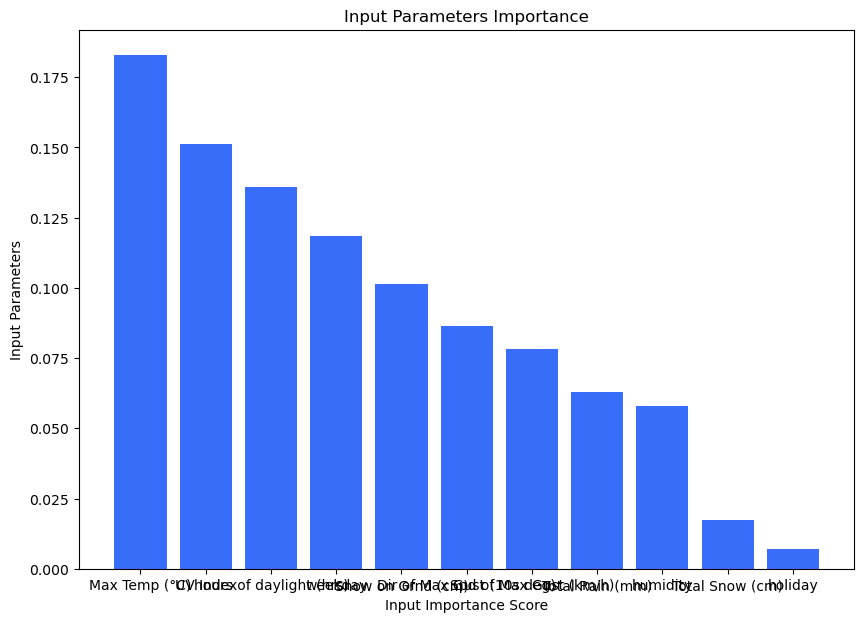

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

In [22]:
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_list = df.columns.drop('prefRoute')
print(feature_list)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Index(['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
       'holiday', 'weekday', 'humidity'],
      dtype='object')
Variable: Max Temp (°C)        Importance: 0.18
Variable: UV Index             Importance: 0.15
Variable: hours of daylight (hrs) Importance: 0.14
Variable: weekday              Importance: 0.12
Variable: Snow on Grnd (cm)    Importance: 0.1
Variable: Dir of Max Gust (10s deg) Importance: 0.09
Variable: Spd of Max Gust (km/h) Importance: 0.08
Variable: Total Rain (mm)      Importance: 0.06
Variable: humidity             Importance: 0.06
Variable: Total Snow (cm)      Importance: 0.02
Variable: holiday              Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

In [23]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
#plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
#plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
#plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


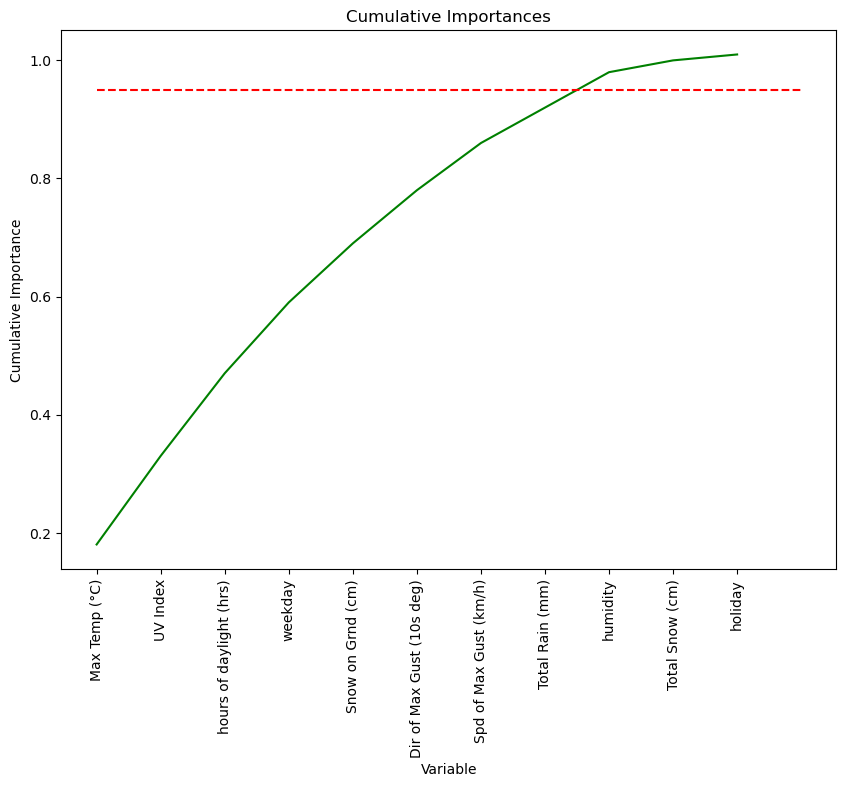

In [24]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


In [25]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


In [26]:
print(sorted_features)
print()
print(sorted_features[:9])

['Max Temp (°C)', 'UV Index', 'hours of daylight (hrs)', 'weekday', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Total Rain (mm)', 'humidity', 'Total Snow (cm)', 'holiday']

['Max Temp (°C)', 'UV Index', 'hours of daylight (hrs)', 'weekday', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Total Rain (mm)', 'humidity']


In [27]:
# Need to set this up for Workshop
#X = df.drop(['prefRoute', 'Total Snow (cm)', 'holiday'],axis=1)
X = df.drop(['prefRoute','humidity','Total Snow (cm)'],axis=1)
y = df['prefRoute']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train.info()
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.series.Series'>
Index: 255 entries, 259 to 309
Series name: prefRoute
Non-Null Count  Dtype 
--------------  ----- 
255 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
(110, 9)
(110,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [30]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=clf.predict(X_test)

In [32]:
# drop 'humidity','Total Snow (cm)'
# Original ['prefRoute', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
#       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
#       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
#       'holiday', 'weekday', 'humidity']

In [33]:
preferedRoute_index = clf.predict([[1.1,3.0,15,26.0,35,9.2,1.2,1,3]])
#Need to set this up for Workshop
print(preferedRoute_index)

['ADAWE']


In [34]:
from sklearn import metrics

In [35]:
print(list(y_test))
print(list(y_pred))

['ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ORPY', 'ADAWE', 'ADAWE', 'ADAWE', 'ORPY', 'LMET', 'LMET', 'ADAWE', 'ALEX', 'LMET', 'ADAWE', 'ADAWE', 'CRTZ', 'LMET', 'ORPY', 'ADAWE', 'ADAWE', 'COBY', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ORPY', 'CRTZ', 'ORPY', 'LMET', 'CRTZ', 'ADAWE', 'ADAWE', 'LMET', 'COBY', 'ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'COBY', 'CRTZ', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'LMET', 'LMET', 'ADAWE', 'ADAWE', 'LMET', 'ADAWE', 'CRTZ', 'LMET', 'LMET', 'ADAWE', 'ADAWE', 'COBY', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'LMET', 'ADAWE', 'CRTZ', 'LMET', 'ADAWE', 'LMET', 'CRTZ', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'ORPY', 'LMET', 'LMET', 'LMET', 'ORPY', 'LMET', 'COBY', 'ADAWE', 'CRTZ', 'CRTZ', 'ADAWE', 'ADAWE', 'CRTZ', 'LMET', 'LMET', 'ADAWE', 'CRTZ', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'COBY', 'LMET', 'ORPY', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE']
['ADAWE', 'LMET', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 'ADAWE', 

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7636363636363637


Removing low importance features in a random forest can have the following effects:
- Improves model performance: Eliminating noisy, irrelevant or misleading features prevents them from negatively impacting individual decision trees. This can improve overall random forest accuracy.
- Reduces overfitting: Less features means less likelihood of overfitting to spurious patterns. Removal of unimportant features acts as a form of regularization.
- Speeds up computation: As the number of features decreases, so does the time to train and evaluate trees. Pruning features reduces complexity and increases efficiency.
- Enhances interpretability: Focusing on the most important features makes it easier to explain predictions and understand model behavior. The core signal is retained.
- May decrease model variance: Removing extraneous features may lower variance between individual trees, tightening predictions. But could also remove useful predictors.
- Risks losing information: Low importance may still contain some useful signal. Eliminating too aggressively may degrade model performance if important interactions exist.
The effect also depends on why a feature has low importance. It may be irrelevant or it may be redundant. Redundant features can likely be removed with a minimal impact on model accuracy. But irrelevant features should definitely be removed to improve the random forest.

**However, it should be noted that ...**

In some situations, removing low importance features can lower the accuracy of a random forest model:
- Highly correlated features: If two features are highly correlated, one may get rated as less important. But eliminating it removes useful signal.
- Small dataset size: With little data, importance scores are less reliable. Removing features deemed unimportant could remove useful predictors.
- Interactions with other features: A feature may not be directly predictive but could have interactions that contribute to accuracy. Its removal disables these interactions.
- Noise reduction: A feature with little signal may be acting as a noise filter that improves accuracy. Removing it eliminates this regularization effect.
- Target leakage: A feature unrelated to the target may leak signal from the target itself. Removing it eliminates this leakage which benefited accuracy.
- Simplistic importance metric: The importance metric used may not fully capture a feature's contribution. The tree structure matters.
- Capturing side effects: An unimportant feature may capture some secondary effects or proxies that contribute a bit to accuracy.
In general, if the low importance features exhibit any interactions, redundancies or hidden effects, removing too many of them could degrade the performance of the random forest model. A careful balance is needed.